In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# getting the csv file
os.chdir('C:\\Users\\Khizar\\Desktop\\Semester - Spring 2021\\5 - Machine Learning 4375\\CSV')
path = os.getcwd()
path

# setting data frame
df = pd.read_csv('titanic.csv')

In [2]:
#  checking head
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [3]:
# Checking missing stuff
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In [4]:
# Looks like there are many null values in the columns
df.isna().sum()

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

In [5]:
# Many useless columns
df = df.drop(['cabin', 'boat', 'home.dest', 'body' ], axis = 1)

In [6]:
# Checking left overs 
df.isna().sum()

pclass        1
survived      1
name          1
sex           1
age         264
sibsp         1
parch         1
ticket        1
fare          2
embarked      3
dtype: int64

In [7]:
# Setting average age and filling missing ages
def impute_age(cols):   
       Age = cols[0]    
       Pclass = cols[1]       
       if pd.isnull(Age):
            if Pclass == 1:           
                return 37
            elif Pclass == 2:           
                return 29
            else:           
                return 24
       else: return Age

In [8]:
df = df.dropna()
df.isna().sum()
# now evertthing is full. All rows are full.

pclass      0
survived    0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
dtype: int64

In [9]:
# grouping survival
df.groupby('survived').count()

,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked
survived,,,,,,,,,
0.0,618,618,618,618,618,618,618,618,618
1.0,425,425,425,425,425,425,425,425,425


In [10]:
# Setting y to survived and x to the other rest columns
x = pd.get_dummies(df.drop('survived', axis = 1), drop_first = True)
y = df['survived'] 

In [11]:
# MORE imports
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix

In [12]:
# Doing test train split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 101)

In [13]:
model = RandomForestClassifier(n_estimators = 300, max_features = 'auto', random_state = 101)

In [14]:
# Fitting model
model.fit(x_train,y_train)
# Predicting after passing xtest
predicting = model.predict(x_test)


In [15]:
print(predicting)

[0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1.
 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0.
 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1.
 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1.
 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0.
 0.]


In [17]:
print(confusion_matrix(y_test, predicting))

[[171   7]
 [ 47  88]]


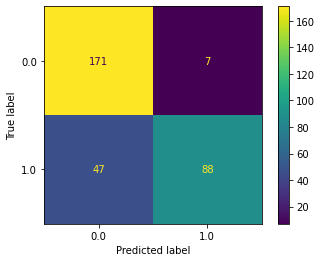

In [18]:
# Plotting confusion metrix
plot_confusion_matrix(model, x_test, y_test)

In [19]:
# checking important features
model.feature_importances_


array([0.04670641, 0.06110395, 0.02031705, ..., 0.00048086, 0.00354725,
       0.00991866])

In [20]:
pd.DataFrame(index=x.columns, data=model.feature_importances_,columns=['Important Features'])

,Important Features
pclass,0.046706
age,0.061104
sibsp,0.020317
parch,0.026653
fare,0.064445
...,...
ticket_W.E.P. 5734,0.000441
ticket_W/C 14208,0.000000
ticket_WE/P 5735,0.000481
embarked_Q,0.003547


In [22]:
test_error = []
for n in range (1, 40):
    model = RandomForestClassifier(n_estimators = n, max_features = 'auto')
    model.fit(x_train,y_train)
    test_predicts = model.predict(x_test)
    test_error.append(1-accuracy_score(test_predicts ,y_test))

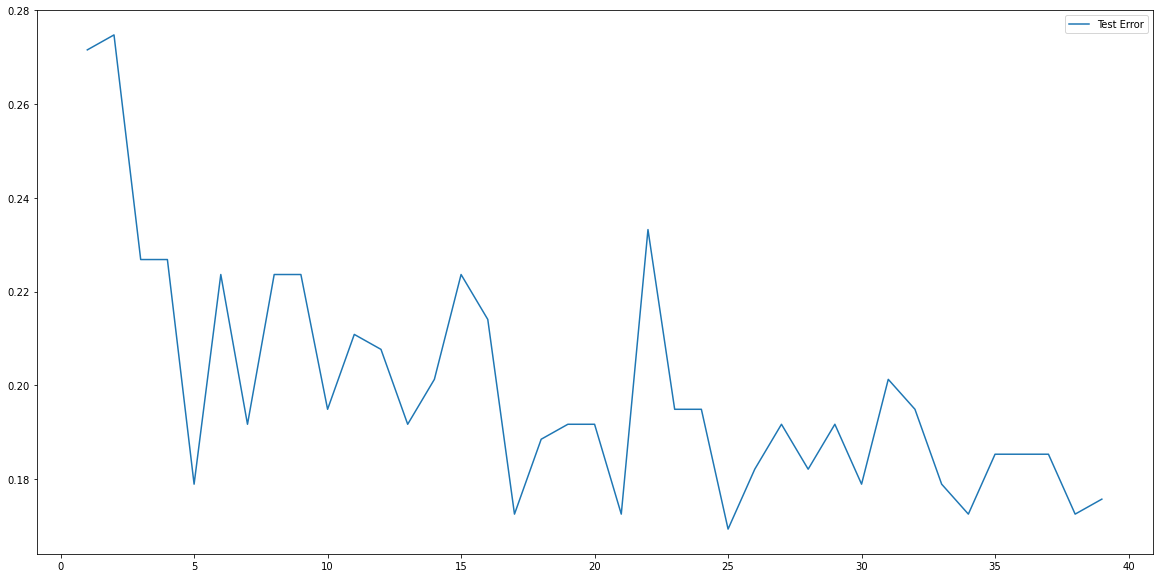

In [23]:
#plotting graph for model accuracy check
plt.figure(figsize=(20, 10))
plt.plot(range(1, 40), test_error, label = 'Test Error')
plt.legend()